In [1]:
import numpy as np
import pandas as pd
import seaborn as sn
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

In [2]:
# Data loading
dtype_dict = {'bathrooms':float, 'waterfront':int, 'sqft_above':int, 'sqft_living15':float, 'grade':int, 'yr_renovated':int, 'price':float, 'bedrooms':float, 'zipcode':str, 'long':float, 'sqft_lot15':float, 'sqft_living':float, 'floors':str, 'condition':int, 'lat':float, 'date':str, 'sqft_basement':int, 'yr_built':int, 'id':str, 'sqft_lot':int, 'view':int}
houses = pd.read_csv("domy.csv", sep=',', dtype=dtype_dict)
houses.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3.0,1.00,1180.0,5650,1,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340.0,5650.0
1,6414100192,20141209T000000,538000.0,3.0,2.25,2570.0,7242,2,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690.0,7639.0
2,5631500400,20150225T000000,180000.0,2.0,1.00,770.0,10000,1,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720.0,8062.0
3,2487200875,20141209T000000,604000.0,4.0,3.00,1960.0,5000,1,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360.0,5000.0
4,1954400510,20150218T000000,510000.0,3.0,2.00,1680.0,8080,1,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800.0,7503.0


In [3]:
random_state = 2134
prices = houses['price']
houses.drop('price', axis=1, inplace=True)
features = houses.columns.values
features

array(['id', 'date', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot',
       'floors', 'waterfront', 'view', 'condition', 'grade', 'sqft_above',
       'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode', 'lat',
       'long', 'sqft_living15', 'sqft_lot15'], dtype=object)

### First observations:
#### 1. Removing the id column - carries no information
#### 2. Removing the exact sale date, we will only leave the year - then change the data type to int32
#### 3. Changed floors data type to float64 and changed zipcode to int32.


In [4]:
# 1
houses.drop('id', axis=1, inplace=True)

# 2
houses["date"] = houses.date.apply(lambda x: x[:4])
houses = houses.astype({'date': 'int32'})

# 3
houses = houses.astype({'floors': 'float64', 'zipcode' : 'int32'})

In [5]:
houses.head()

,date,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,2014,3.0,1.00,1180.0,5650,1.0,0,0,3,7,1180,0,1955,0,98178,47.5112,-122.257,1340.0,5650.0
1,2014,3.0,2.25,2570.0,7242,2.0,0,0,3,7,2170,400,1951,1991,98125,47.7210,-122.319,1690.0,7639.0
2,2015,2.0,1.00,770.0,10000,1.0,0,0,3,6,770,0,1933,0,98028,47.7379,-122.233,2720.0,8062.0
3,2014,4.0,3.00,1960.0,5000,1.0,0,0,5,7,1050,910,1965,0,98136,47.5208,-122.393,1360.0,5000.0
4,2015,3.0,2.00,1680.0,8080,1.0,0,0,3,8,1680,0,1987,0,98074,47.6168,-122.045,1800.0,7503.0


In [6]:
#train/test split
houses_train, houses_test, prices_train, prices_test = train_test_split(houses, 
                                                                        prices, 
                                                                        test_size=0.33, 
                                                                        random_state=random_state)

### Analysis of basic numerical data describing a set

In [7]:
#Wypisanie najważniejszych danych liczbowych
houses_train.describe()

,date,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,14480.000000,14480.000000,14480.000000,14480.000000,1.448000e+04,14480.000000,14480.000000,14480.000000,14480.000000,14480.000000,14480.000000,14480.000000,14480.000000,14480.000000,14480.000000,14480.000000,14480.000000,14480.000000,14480.000000
mean,2014.319199,3.368232,2.111602,2074.006354,1.493008e+04,1.489503,0.007528,0.234807,3.408909,7.650967,1783.052970,290.953384,1970.737017,87.919959,98077.657942,47.560084,-122.214495,1982.632873,12777.856630
std,0.466182,0.907588,0.769178,910.311867,3.904658e+04,0.537361,0.086438,0.771839,0.647150,1.172938,823.976513,439.779137,29.422447,409.549399,53.434925,0.138996,0.140455,682.765905,27799.024593
min,2014.000000,0.000000,0.000000,290.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,1.000000,290.000000,0.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,659.000000
25%,2014.000000,3.000000,1.500000,1420.000000,5.050000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,0.000000,1951.000000,0.000000,98033.000000,47.471100,-122.329000,1480.000000,5104.250000
50%,2014.000000,3.000000,2.250000,1910.000000,7.632000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,0.000000,1974.000000,0.000000,98065.000000,47.572100,-122.231000,1840.000000,7643.000000
75%,2015.000000,4.000000,2.500000,2550.000000,1.070125e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2200.000000,560.000000,1996.000000,0.000000,98117.000000,47.677900,-122.126000,2360.000000,10083.250000
max,2015.000000,10.000000,8.000000,13540.000000,1.074218e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,4130.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,5790.000000,871200.000000


##### Conclusions
1. The number of variables in each column is the same - no empty places in the set
2. Means of individual characteristics vary considerably, for better operation of the regressor, standardization / normalization would be required
3. The data in the date column shows that house sales were recorded only in 2014-2015, so the value of the date variable drops dramatically - no historical data
4. Some variables have very low standard deviations (even comparing them to the mean), so their use may give poor results

### Variable correlation analysis

In [8]:
train_df = houses_train.copy()
train_df["price"] = prices_train.copy()
corr_mat = train_df.corr()
corr_mat

,date,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,price
date,1.000000,-0.006198,-0.024717,-0.027699,0.007897,-0.020948,0.002069,0.010120,-0.040973,-0.028643,-0.024043,-0.012288,0.002576,-0.032268,0.000552,-0.034002,0.005951,-0.020432,0.009793,0.005360
bedrooms,-0.006198,1.000000,0.522094,0.589289,0.030676,0.180908,-0.014207,0.073847,0.027598,0.362152,0.486472,0.308326,0.163952,0.010416,-0.152715,-0.004206,0.128573,0.401268,0.024589,0.312454
bathrooms,-0.024717,0.522094,1.000000,0.757601,0.099708,0.499238,0.054106,0.181080,-0.120267,0.667101,0.684363,0.285948,0.506129,0.040960,-0.200206,0.024900,0.220090,0.570872,0.090573,0.526523
sqft_living,-0.027699,0.589289,0.757601,1.000000,0.187630,0.357997,0.095404,0.275933,-0.056959,0.763484,0.876045,0.428560,0.324925,0.047384,-0.195073,0.052698,0.240704,0.758141,0.184628,0.699182
sqft_lot,0.007897,0.030676,0.099708,0.187630,1.000000,-0.001078,0.026956,0.079100,-0.016403,0.130206,0.199452,0.014685,0.064665,0.005008,-0.133056,-0.080522,0.244624,0.150349,0.742187,0.102123
floors,-0.020948,0.180908,0.499238,0.357997,-0.001078,1.000000,0.019545,0.031587,-0.263419,0.455397,0.527761,-0.247792,0.481501,0.002416,-0.054275,0.045167,0.125416,0.284109,-0.003784,0.260228
waterfront,0.002069,-0.014207,0.054106,0.095404,0.026956,0.019545,1.000000,0.401049,0.014111,0.074964,0.069253,0.067726,-0.027383,0.101497,0.044909,-0.017902,-0.047286,0.081044,0.025615,0.250404
view,0.010120,0.073847,0.181080,0.275933,0.079100,0.031587,0.401049,1.000000,0.046557,0.247992,0.160404,0.270627,-0.050506,0.093200,0.094275,0.007972,-0.083450,0.279033,0.075214,0.387514
condition,-0.040973,0.027598,-0.120267,-0.056959,-0.016403,-0.263419,0.014111,0.046557,1.000000,-0.145341,-0.158618,0.179287,-0.354973,-0.058163,0.002985,-0.011782,-0.103354,-0.090331,-0.014935,0.037746
grade,-0.028643,0.362152,0.667101,0.763484,0.130206,0.455397,0.074964,0.247992,-0.145341,1.000000,0.755461,0.164917,0.450710,0.007531,-0.183469,0.112723,0.201311,0.716087,0.127091,0.670397


Due to the large number of variables, it was decided to sort the values of the coefficients.

In [9]:
corr = corr_mat.to_numpy()
features = corr_mat.columns
sorted_dict = {}
for i in range(corr.shape[0]):
    for j in range(corr.shape[1]):
        name = features[i] + ' ' + features[j]
        sorted_dict[name] = corr[i, j]
sorted_dict = {k: v for k, v in sorted(sorted_dict.items(), key=lambda item: item[1])}

In [10]:
sorted_dict

{'zipcode long': -0.5588475693480068,
 'long zipcode': -0.5588475693480068,
 'condition yr_built': -0.35497326205565943,
 'yr_built condition': -0.35497326205565943,
 'yr_built zipcode': -0.3500301753523833,
 'zipcode yr_built': -0.3500301753523833,
 'zipcode sqft_living15': -0.275287346960849,
 'sqft_living15 zipcode': -0.275287346960849,
 'floors condition': -0.2634191919952334,
 'condition floors': -0.2634191919952334,
 'sqft_above zipcode': -0.25614093589887704,
 'zipcode sqft_above': -0.25614093589887704,
 'floors sqft_basement': -0.24779181518513763,
 'sqft_basement floors': -0.24779181518513763,
 'yr_built yr_renovated': -0.2285052802838571,
 'yr_renovated yr_built': -0.2285052802838571,
 'bathrooms zipcode': -0.2002059824362135,
 'zipcode bathrooms': -0.2002059824362135,
 'sqft_living zipcode': -0.19507328111821332,
 'zipcode sqft_living': -0.19507328111821332,
 'grade zipcode': -0.18346852459344748,
 'zipcode grade': -0.18346852459344748,
 'condition sqft_above': -0.1586179834

##### Conclusions
1. There is a high correlation between variables sqft_above and sqft_living - 0.876
2. There is a high correlation between variables grade and sqft_living - 0.763
3. There is a high correlation between variables sqft_living15 and sqft_living - 0.758
4. The house price has a very high correlation with the sqft_living variable and a very low correlation with the date trait- 0.000316.

### Skewness analysis of the set

In [11]:
houses_train.skew()

date              0.775774
bedrooms          0.500766
bathrooms         0.484997
sqft_living       1.424669
sqft_lot         11.316967
floors            0.619643
waterfront       11.396426
view              3.412270
condition         1.038384
grade             0.757818
sqft_above        1.442929
sqft_basement     1.531634
yr_built         -0.462426
yr_renovated      4.444152
zipcode           0.401682
lat              -0.488591
long              0.903667
sqft_living15     1.079912
sqft_lot15       10.297309
dtype: float64

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000002D93D017F08>]],
      dtype=object)

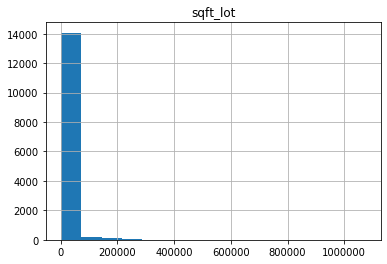

In [12]:
houses_train.hist(column=["sqft_lot"], bins = 15)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000002D93F77D448>]],
      dtype=object)

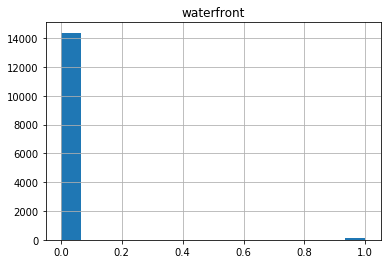

In [13]:
houses_train.hist(column=["waterfront"], bins = 15)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000002D93F831708>]],
      dtype=object)

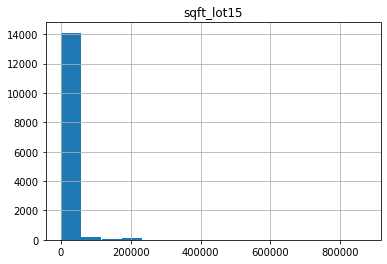

In [14]:
houses_train.hist(column=["sqft_lot15"], bins = 15)

##### Conclusions
1. Some parameters have high skewness (waterfront, sqft_lot, sqft_lot15). This fact may have a negative impact on the quality of the model.

In the case of the waterfront feature, we can't do anything about it becouse variable is categorical.

For the other two parameters, we can apply some operations that will minimize the impact of skewness.

### Application of previous conclussions

In [15]:
houses_train.drop('sqft_above', axis=1, inplace=True)
houses_test.drop('sqft_above', axis=1, inplace=True)

houses_train.drop('date', axis=1, inplace=True)
houses_test.drop('date', axis=1, inplace=True)

C:\Users\MSI\anaconda3\lib\site-packages\pandas\core\frame.py:3997: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


## Creation of new features

In [16]:
simple_features = houses_train.columns.values

### The first two features will be created to reduce the skewness of the histograms of two features: sqft_lot15 and sqft_lot

In [17]:
houses_train["log_sqft_lot15"] = houses_train["sqft_lot15"].apply(np.log)
houses_train["log_sqft_lot"] = houses_train["sqft_lot"].apply(np.log)

houses_test["log_sqft_lot15"] = houses_test["sqft_lot15"].apply(np.log)
houses_test["log_sqft_lot"] = houses_test["sqft_lot"].apply(np.log)

C:\Users\MSI\anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
C:\Users\MSI\anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
C:\Users\MSI\anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the d

In [18]:
houses_train.skew()

bedrooms           0.500766
bathrooms          0.484997
sqft_living        1.424669
sqft_lot          11.316967
floors             0.619643
waterfront        11.396426
view               3.412270
condition          1.038384
grade              0.757818
sqft_basement      1.531634
yr_built          -0.462426
yr_renovated       4.444152
zipcode            0.401682
lat               -0.488591
long               0.903667
sqft_living15      1.079912
sqft_lot15        10.297309
log_sqft_lot15     0.991455
log_sqft_lot       0.973357
dtype: float64

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000002D93F985088>]],
      dtype=object)

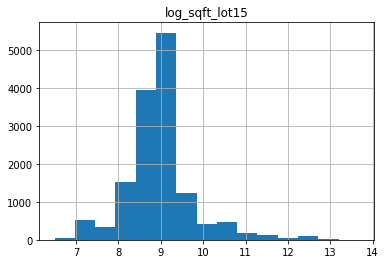

In [19]:
houses_train.hist(column=["log_sqft_lot15"], bins = 15)

##### Conclusions
1. It was possible to significantly minimize the skewness coefficients using the logarithm operation

### The next 3 features were selected through our own intuition

1. A feature describing the number of bathrooms per unit area of the house
2. A feature describing the number of bedrooms per unit area of the house
3. Average area of one floor

In [20]:
houses_train["bedrooms_per_sqft"] = houses_train["bedrooms"] / houses_train["sqft_living"]
houses_test["bedrooms_per_sqft"] = houses_test["bedrooms"] / houses_test["sqft_living"]

houses_train["bathrooms_per_sqft"] = houses_train["bathrooms"] / houses_train["sqft_living"]
houses_test["bathrooms_per_sqft"] = houses_test["bathrooms"] / houses_test["sqft_living"]

houses_train["average_floor_area"] = houses_train["sqft_living"] / houses_train["floors"]
houses_test["average_floor_area"] = houses_test["sqft_living"] / houses_test["floors"]

C:\Users\MSI\anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
C:\Users\MSI\anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
C:\Users\MSI\anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the d

### The next 3 features were selected randomly and are treated as an experiment

1. The number of years between purchase and renovation
2. The product of View, Condition and Grade points
3. The sum of View, Condition and Grade points

In [21]:
houses_train["years_to_renovate"] = houses_train["yr_renovated"] - houses_train["yr_built"]
houses_test["years_to_renovate"] = houses_test["yr_renovated"] - houses_test["yr_built"]

houses_train["product_of_rates"] = houses_train["view"] * houses_train["condition"] * houses_train["grade"] 
houses_test["product_of_rates"] = houses_test["view"] * houses_test["condition"] * houses_test["grade"] 

houses_train["sum_of_rates"] = houses_train["view"] + houses_train["condition"] + houses_train["grade"] 
houses_test["sum_of_rates"] = houses_test["view"] + houses_test["condition"] + houses_test["grade"] 

C:\Users\MSI\anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
C:\Users\MSI\anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
C:\Users\MSI\anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the d

In [22]:
new_features = list(set(houses_train.columns.values) - set(simple_features))
all_features = houses_train.columns.values
new_features

['years_to_renovate',
 'average_floor_area',
 'log_sqft_lot15',
 'log_sqft_lot',
 'sum_of_rates',
 'product_of_rates',
 'bathrooms_per_sqft',
 'bedrooms_per_sqft']

##### Summary
1. I managed to create 8 new features that will be used to build regression models later in the project.

In [23]:
houses_train[new_features].describe()

,years_to_renovate,average_floor_area,log_sqft_lot15,log_sqft_lot,sum_of_rates,product_of_rates,bathrooms_per_sqft,bedrooms_per_sqft
count,14480.000000,14480.000000,14480.000000,14480.000000,14480.000000,14480.000000,14480.000000,14480.000000
mean,-1882.817058,1484.857151,8.963490,8.990946,11.294682,7.058633,0.001078,0.001798
std,417.256926,652.050549,0.808289,0.895737,1.632547,24.321620,0.000316,0.000572
min,-2015.000000,253.333333,6.490724,6.253829,2.000000,0.000000,0.000000,0.000000
25%,-1996.000000,1025.000000,8.537829,8.527144,10.000000,0.000000,0.000858,0.001385
50%,-1974.000000,1370.000000,8.941545,8.940105,11.000000,0.000000,0.001032,0.001739
75%,-1950.000000,1820.000000,9.218631,9.278116,12.000000,0.000000,0.001250,0.002128
max,114.000000,7050.000000,13.677627,13.887104,21.000000,240.000000,0.003767,0.006122


##### Conclusions
1. The values appear to be made correctly.
2. There are considerable size differences (5 orders of magnitude) between the listed variables.

The next step will be to analyze the correlation matrix.

In [24]:
train_df[new_features] = houses_train[new_features].copy()
train_df.corr()

,date,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,...,sqft_lot15,price,years_to_renovate,average_floor_area,log_sqft_lot15,log_sqft_lot,sum_of_rates,product_of_rates,bathrooms_per_sqft,bedrooms_per_sqft
date,1.000000,-0.006198,-0.024717,-0.027699,0.007897,-0.020948,0.002069,0.010120,-0.040973,-0.028643,...,0.009793,0.005360,-0.031854,-0.008835,-0.000792,0.000366,-0.032036,0.004855,0.002874,0.028879
bedrooms,-0.006198,1.000000,0.522094,0.589289,0.030676,0.180908,-0.014207,0.073847,0.027598,0.362152,...,0.024589,0.312454,-0.001337,0.432426,0.165063,0.187343,0.306049,0.090433,-0.240193,0.020686
bathrooms,-0.024717,0.522094,1.000000,0.757601,0.099708,0.499238,0.054106,0.181080,-0.120267,0.667101,...,0.090573,0.526523,0.004515,0.366407,0.096116,0.107765,0.517230,0.206183,0.195825,-0.532986
sqft_living,-0.027699,0.589289,0.757601,1.000000,0.187630,0.357997,0.095404,0.275933,-0.056959,0.763484,...,0.184628,0.699182,0.023597,0.648713,0.324276,0.349457,0.656419,0.312370,-0.432324,-0.693227
sqft_lot,0.007897,0.030676,0.099708,0.187630,1.000000,-0.001078,0.026956,0.079100,-0.016403,0.130206,...,0.742187,0.102123,0.000356,0.158374,0.576368,0.657750,0.124444,0.074063,-0.121953,-0.154899
floors,-0.020948,0.180908,0.499238,0.357997,-0.001078,1.000000,0.019545,0.031587,-0.263419,0.455397,...,-0.003784,0.260228,-0.031582,-0.393000,-0.218407,-0.228492,0.237703,0.041768,0.157785,-0.322524
waterfront,0.002069,-0.014207,0.054106,0.095404,0.026956,0.019545,1.000000,0.401049,0.014111,0.074964,...,0.025615,0.250404,0.101553,0.074137,0.082658,0.077877,0.249062,0.385049,-0.044286,-0.086545
view,0.010120,0.073847,0.181080,0.275933,0.079100,0.031587,0.401049,1.000000,0.046557,0.247992,...,0.075214,0.387514,0.095039,0.250182,0.119630,0.121855,0.669413,0.968751,-0.136120,-0.220885
condition,-0.040973,0.027598,-0.120267,-0.056959,-0.016403,-0.263419,0.014111,0.046557,1.000000,-0.145341,...,-0.014935,0.037746,-0.032058,0.151329,0.074157,0.066553,0.313993,0.097798,-0.084130,0.089406
grade,-0.028643,0.362152,0.667101,0.763484,0.130206,0.455397,0.074964,0.247992,-0.145341,1.000000,...,0.127091,0.670397,-0.024389,0.375240,0.192000,0.191998,0.778104,0.287830,-0.208301,-0.604007


##### Conclusions
1. As we can observe, the highest correlation between the new features and the written variable was noted for the average area per floor (0.60) and the number of bedrooms per square meter (0.48).
2. As could be expected, there is a correlation between log_sqft_lot15 and sqft_lot15 and log_sqft_lot and sqft_lot

### Build Linear Regression model

In [25]:
class LinearRegression():
    def __init__(self, type='simple', lamb=0):
        self.type = type
        self.lamb = lamb
    
    def fit(self, x_train, y_train):
        if self.type is 'simple': # regresja prosta
            pinw = np.linalg.pinv(x_train)
            self.w = np.dot(pinw,y_train)
        elif self.type is 'L2': # regresja grzbietowa bez wyrazu wolnego
            n = x_train.shape[1]
            w = np.dot(x_train.T, x_train)
            m = np.diag([1]*(n))
            w = w + self.lamb * m
            w = np.dot(np.linalg.inv(w), x_train.T)
            w = np.dot(w, y_train)
            self.w = w
        else:
            print("Błędny typ modelu")
            
    def predict(self, x_test):
        return np.dot(x_test, self.w)

In [26]:
def mean_squared_error(a, b):
    MSE = 0
    for i in range(len(a)):
        diff = a[i]-b[i]
        MSE += diff**2
    return MSE/len(a)

### Backward elimination function with MSE condition

In [27]:
def backward_elimination(x, y, n):
    x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)
    model = LinearRegression()
    model.fit(x_train, y_train)
    preds = model.predict(x_test)
    min_MSE = mean_squared_error(y_test, preds)
    min_features_list = list(x.columns.values)
    
    while len(min_features_list) > n:
        errors = []
        for i, feature in enumerate(min_features_list):
            temp_features_list = list(min_features_list[0:i]) + list(min_features_list[i+1:])
            model = LinearRegression()
            model.fit(x_train[temp_features_list], y_train)
            preds = model.predict(x_test[temp_features_list])
            MSE = mean_squared_error(y_test, preds)
            errors.append(MSE)
        if min(errors) < min_MSE:
            min_MSE = min(errors)
            idx = errors.index(min(errors))
            min_features_list.remove(min_features_list[idx])            
        else:
            break
        
    return min_features_list   

In [28]:
n = 5
features_backward = backward_elimination(houses_train, prices_train.to_numpy(), n)

In [29]:
sorted(features_backward)

['average_floor_area',
 'bathrooms_per_sqft',
 'bedrooms',
 'bedrooms_per_sqft',
 'condition',
 'floors',
 'grade',
 'lat',
 'log_sqft_lot',
 'log_sqft_lot15',
 'long',
 'product_of_rates',
 'sqft_living',
 'sqft_living15',
 'sqft_lot',
 'sqft_lot15',
 'sum_of_rates',
 'waterfront',
 'years_to_renovate',
 'yr_built',
 'zipcode']

After achieving the above 18 features, subtracting any feature increased the error.

### Backward elimination function with MSE condition without early stopping

In [30]:
def backward_elimination_v2(x, y, n):
    x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)
    model = LinearRegression()
    model.fit(x_train, y_train)
    preds = model.predict(x_test)
    min_MSE = mean_squared_error(y_test, preds)
    min_features_list = list(x.columns.values)
    
    while len(min_features_list) > n:
        errors = []
        for i, feature in enumerate(min_features_list):
            temp_features_list = list(min_features_list[0:i]) + list(min_features_list[i+1:])
            model = LinearRegression()
            model.fit(x_train[temp_features_list], y_train)
            preds = model.predict(x_test[temp_features_list])
            MSE = mean_squared_error(y_test, preds)
            errors.append(MSE)

        min_MSE = min(errors)
        idx = errors.index(min(errors))
        min_features_list.remove(min_features_list[idx])            

        
    return min_features_list   

In [31]:
n = 5
features_backward_v2 = backward_elimination_v2(houses_train, prices_train.to_numpy(), n)

In [32]:
sorted(features_backward_v2)

['bedrooms', 'lat', 'sqft_living', 'sum_of_rates', 'zipcode']

### Forward selection function with MSE condition

In [33]:
def forward_selection(x, y, n):
    x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.33)
    features_list = list(x.columns.values)
    model = LinearRegression()
    model.fit(x_train[features_list[0]].to_numpy().reshape(-1, 1), y_train)
    preds = model.predict(x_test[features_list[0]].to_numpy().reshape(-1, 1))
    min_MSE = mean_squared_error(y_test, preds)
    selected_features = []
    
    while len(selected_features) < n:
        errors = []
        for i, feature in enumerate(features_list):
            temp_features_list = selected_features + [feature]
            model = LinearRegression()
            model.fit(x_train[temp_features_list], y_train)
            preds = model.predict(x_test[temp_features_list])
            MSE = mean_squared_error(y_test, preds)
            errors.append(MSE)
        min_error = min(errors)
        if min_error < min_MSE:
            idx = errors.index(min(errors))
            selected_features.append(features_list[idx])
            features_list.remove(features_list[idx])
            min_MSE = min_error
        else:
            break
        
    return selected_features

In [34]:
features_forward = forward_selection(houses_train, prices_train.to_numpy(), 5)

In [35]:
sorted(features_forward)

['grade', 'product_of_rates', 'sqft_living', 'view', 'yr_built']

### Lasso method for feature selection

In [36]:
from sklearn import preprocessing
from sklearn import linear_model 

In [37]:
# Data normalization
houses_train_norm = preprocessing.normalize(houses_train, norm='l2')

Dzięki wykorzystaniu regularyzacji jesteśmy w stanie określić, które cechy są mniej istotne dla naszego modelu - niższe wartości współczynników.

In [38]:
alpha = 0.1
model = linear_model.Lasso(alpha=alpha)
model.fit(houses_train_norm, prices_train)
coefs = list(abs(model.coef_))
sorted_coefs = sorted(coefs, reverse=True)

C:\Users\MSI\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 284952199153653.0, tolerance: 187511759294.1099
  positive)


In [39]:
num_of_features = 5
lasso_features = []
for i in range(num_of_features):
    idx = coefs.index(sorted_coefs[i])
    lasso_features.append(all_features[idx])
lasso_features

['grade', 'bedrooms', 'sum_of_rates', 'yr_built', 'product_of_rates']

### Find the best hiperparameter for Ridge Regression model

In [40]:
def split_set(x_train, y_train, folds = 10):  
    length = int(len(x_train)/folds)
    x_folds = []
    y_folds = []
    for i in range(folds-1):
        x_folds.append(x_train[i*length:(i+1)*length])
        y_folds.append(y_train[i*length:(i+1)*length].to_numpy())
    x_folds.append(x_train[(folds-1)*length:])
    y_folds.append(y_train[(folds-1)*length:].to_numpy())
    return x_folds, y_folds

In [41]:
# Split train set into 10 folds
folds = 5
x_folds, y_folds = split_set(houses_train, prices_train, folds = folds)

lambdas = [0.0001, 0.0005, 0.001, 0.005, 0.01, 0.05, 0.1, 0.5, 1, 1.5, 5, 10]

errors = []

for lamb in lambdas:
    cross_errors = []
    for i in range(folds):
        model = LinearRegression(lamb=lamb, type='L2')
        index_list = list(set(list(range(folds))) - set([i]))
        x_train = x_folds[index_list[0]]
        y_train = y_folds[index_list[0]]
        for j in index_list[1:]:
            x_train = np.concatenate((x_train, x_folds[j]))
            y_train = np.concatenate((y_train, y_folds[j]))      
        model.fit(x_train, y_train)
        preds = model.predict(x_folds[i])
        cross_errors.append(mean_squared_error(preds, y_folds[i]))
    errors.append(sum(cross_errors)/len(cross_errors))

idx = errors.index(min(errors))
best_lamb = lambdas[idx]
print(best_lamb)

0.001


### Comparison of selected features

In [42]:
prices_train = prices_train.to_numpy()
prices_test = prices_test.to_numpy()

In [43]:
houses_train.head()

,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_basement,...,sqft_living15,sqft_lot15,log_sqft_lot15,log_sqft_lot,bedrooms_per_sqft,bathrooms_per_sqft,average_floor_area,years_to_renovate,product_of_rates,sum_of_rates
14616,4.0,1.75,1880.0,9880,1.0,0,0,4,8,0,...,1880.0,9600.0,9.169518,9.198268,0.002128,0.000931,1880.0,-1967,0,12
20342,5.0,3.75,4270.0,7500,2.0,0,0,3,10,1060,...,2410.0,8350.0,9.030017,8.922658,0.001171,0.000878,2135.0,-2014,0,13
18511,4.0,2.75,3190.0,14904,1.0,0,3,4,9,1250,...,2600.0,11195.0,9.323223,9.609385,0.001254,0.000862,3190.0,43,108,16
1863,3.0,2.00,2140.0,3600,2.0,0,0,3,8,460,...,2340.0,5400.0,8.594154,8.188689,0.001402,0.000935,1070.0,86,0,11
13569,3.0,2.50,2780.0,6000,2.0,0,0,3,9,0,...,1940.0,3466.0,8.150756,8.699515,0.001079,0.000899,1390.0,-2004,0,12


In [44]:
names = ["All features given in the set", 
         "All features given in the set together with the proposed features", 
         "Features selected by the backward elimination method", 
         "Features selected by the backward elimination method v2", 
         "Features selected by the forward selection method",
         "Features selected by the Lasso method",
         "Features selected by the Lasso method with Ridge Regression"] 

features = [simple_features, all_features, features_backward,features_backward_v2, features_forward, lasso_features]
models = []
train_MSE = []
test_MSE = []

for feature in features:
    model = LinearRegression()
    model.fit(houses_train[feature], prices_train)
    preds_train = model.predict(houses_train[feature])
    preds_test = model.predict(houses_test[feature])
    train_MSE.append(mean_squared_error(prices_train, preds_train))
    test_MSE.append(mean_squared_error(prices_test, preds_test))
    models.append(model)
    
model = LinearRegression(type='L2', lamb=best_lamb)
model.fit(houses_train[lasso_features], prices_train)
preds_train = model.predict(houses_train[lasso_features])
preds_test = model.predict(houses_test[lasso_features])
train_MSE.append(mean_squared_error(prices_train, preds_train))
test_MSE.append(mean_squared_error(prices_test, preds_test))
models.append(model)

In [45]:
test_MSE

[43069871397.48062,
 38190755653.06715,
 38322115572.03069,
 51670262186.28049,
 57881759546.427444,
 66835898514.526375,
 66835898637.01801]

In [46]:
train_idx = train_MSE.index(min(train_MSE))
test_idx = test_MSE.index(min(test_MSE))
print('Lowest train MSE: {}'.format(names[train_idx]))
print('Lowest test MSE {}'.format(names[test_idx]))

Lowest train MSE: All features given in the set together with the proposed features
Lowest test MSE All features given in the set together with the proposed features


##### Conclusions
1. There are many Feature Selection methods
2. The best model was trained on all features, including those determined by me